# Polynomial Regression

In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Load the dataset
df = pd.read_csv('../../../../Data/Creation/CSV/Combined_Log_Excl_Roil_Clean_NoNeg.csv')
df.head()

,date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,Real Oil Prices
0,1992-03,8.986886,8.839001,4.024816,13.544280,12.005919,4.134350,4.262926,4.237888,4.394678,...,4.065979,2.478218,2.621766,2.426571,4.330733,11.050763,12.159442,6.619469,2.786412,13.601725
1,1992-04,8.990617,8.841752,4.025655,13.550922,12.011936,4.142042,4.270416,4.245491,4.404083,...,4.069727,2.481568,2.622492,2.430099,4.346399,11.071004,12.159567,6.628021,2.784301,14.512195
2,1992-06,9.000118,8.851692,4.033497,13.552670,12.020207,4.145887,4.273481,4.248251,4.405713,...,4.072355,2.485740,2.630449,2.434490,4.387014,11.051223,12.169043,6.652466,2.691453,15.981442
3,1992-07,8.999322,8.850346,4.036839,13.565973,12.027287,4.154825,4.283439,4.259519,4.418656,...,4.076435,2.484907,2.623218,2.436242,4.338597,11.060620,12.169643,6.666419,2.588035,15.501779
4,1992-11,8.996615,8.847863,4.050880,13.569488,12.049436,4.163143,4.292269,4.269875,4.429636,...,4.087739,2.491551,2.630449,2.441477,4.446174,11.042298,12.193706,6.705386,2.680611,14.313863


#### Convert the date column to numerical values

In [2]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Now drop the original date column
df.drop('date', axis=1, inplace=True)

df.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,Real Oil Prices,year,month,day
0,8.986886,8.839001,4.024816,13.544280,12.005919,4.134350,4.262926,4.237888,4.394678,4.078063,...,2.426571,4.330733,11.050763,12.159442,6.619469,2.786412,13.601725,1992,3,1
1,8.990617,8.841752,4.025655,13.550922,12.011936,4.142042,4.270416,4.245491,4.404083,4.096502,...,2.430099,4.346399,11.071004,12.159567,6.628021,2.784301,14.512195,1992,4,1
2,9.000118,8.851692,4.033497,13.552670,12.020207,4.145887,4.273481,4.248251,4.405713,4.113261,...,2.434490,4.387014,11.051223,12.169043,6.652466,2.691453,15.981442,1992,6,1
3,8.999322,8.850346,4.036839,13.565973,12.027287,4.154825,4.283439,4.259519,4.418656,4.139407,...,2.436242,4.338597,11.060620,12.169643,6.666419,2.588035,15.501779,1992,7,1
4,8.996615,8.847863,4.050880,13.569488,12.049436,4.163143,4.292269,4.269875,4.429636,4.157180,...,2.441477,4.446174,11.042298,12.193706,6.705386,2.680611,14.313863,1992,11,1


## Feature Selection and Model Training

In [3]:
# Define features and target
X = df.drop('Real Oil Prices', axis=1)
y = df['Real Oil Prices']

# Splitting the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial transformation
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

### Model Evaluation

We evaluate the performance of our model using various metrics like MAE, MSE, RMSE, and R^2 score.

In [4]:
# Predictions
poly_predictions = poly_model.predict(X_poly_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, poly_predictions)
mse = mean_squared_error(y_test, poly_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, poly_predictions)
mape = np.mean(np.abs((y_test - poly_predictions) / y_test)) * 100

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")
print(f"MAPE: {mape}")


Mean Absolute Error: 1.7294336727132638
Mean Squared Error: 5.03089485193045
Root Mean Squared Error: 2.2429656377061264
R^2 Score: 0.9348038662963238
MAPE: 10.00717346139484


## Visualization

### Actual vs Predicted Values

plot the actual vs predicted values to visually assess the model's performance.

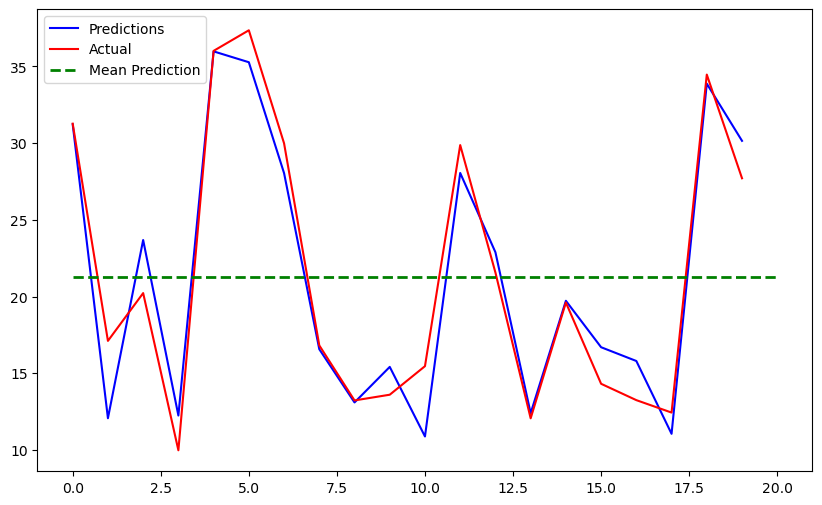

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(poly_predictions, label='Predictions', color='blue')
plt.plot(y_test.values, label='Actual', color='red')
plt.plot([0, len(y_test)], [poly_predictions.mean(), poly_predictions.mean()], '--', lw=2, color='green', label='Mean Prediction')
plt.legend(loc='upper left')
plt.show()

#### Learning Curve

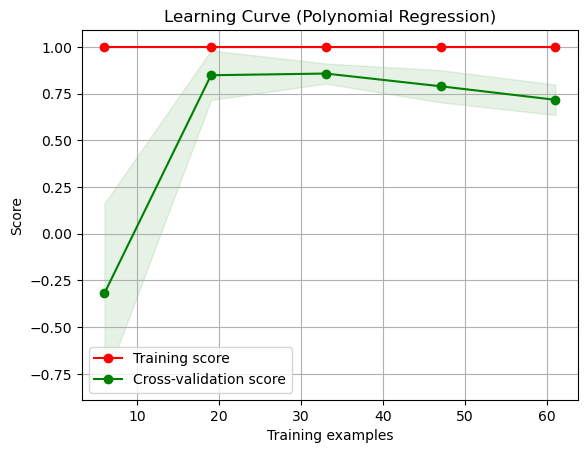

In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(poly_model, "Learning Curve (Polynomial Regression)", X_poly_train, y_train, cv=5)
plt.show()

## Cross Validation

In [7]:
from sklearn.model_selection import cross_val_score

# Transform the entire dataset
X_poly = poly_features.fit_transform(X)

# Perform 5-fold cross-validation
cv_r2_scores = cross_val_score(poly_model, X_poly, y, cv=5, scoring='r2')
cv_mae_scores = cross_val_score(poly_model, X_poly, y, cv=5, scoring='neg_mean_absolute_error')
cv_mse_scores = cross_val_score(poly_model, X_poly, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MAE and MSE scores to positive
cv_mae_scores = -cv_mae_scores
cv_mse_scores = -cv_mse_scores

# Calculate RMSE for each fold
cv_rmse_scores = np.sqrt(cv_mse_scores)

# Print the results
print(f"CV R^2 scores: {cv_r2_scores}")
print(f"Average R^2 score: {np.mean(cv_r2_scores)}")
print(f"CV MAE scores: {cv_mae_scores}")
print(f"Average MAE score: {np.mean(cv_mae_scores)}")
print(f"CV MSE scores: {cv_mse_scores}")
print(f"Average MSE score: {np.mean(cv_mse_scores)}")
print(f"CV RMSE scores: {cv_rmse_scores}")
print(f"Average RMSE score: {np.mean(cv_rmse_scores)}")

# Print the standard deviation of the target variable
print(f"Standard Deviation of the target (y): {np.std(y)}")

CV R^2 scores: [-23.99248658 -57.78265009  -0.40944611 -20.52924608  -4.80606846]
Average R^2 score: -21.50397946395082
CV MAE scores: [ 7.80887548  9.67296074  4.10731518 15.53040031 14.5511127 ]
Average MAE score: 10.334132881574671
CV MSE scores: [ 79.8331233  199.40506269  23.36213589 525.89205852 361.05234818]
Average MSE score: 237.90894571431136
CV RMSE scores: [ 8.93493835 14.12108575  4.83343934 22.93233653 19.00137753]
Average RMSE score: 13.964635499864292
Standard Deviation of the target (y): 8.581054648531135
